## Exploring a real-world dataset containing flights data from the US Department of Transportation.

In [1]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### NOTE

* DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
* DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")

* ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
* ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")

In [2]:
df_flights.shape

(271940, 20)

##### Check for missing values

In [3]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

DepDel15 (Flight departed late) has 2761 missing values. Let's fill those values with 0  meaning those flights weren't delayed

In [4]:
df_flights['DepDel15'].fillna(0,inplace=True)

In [5]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [6]:
df_flights['DepDel15'].value_counts()

0.0    217799
1.0     54141
Name: DepDel15, dtype: int64

#### Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

In [7]:
#
dep_delay = df_flights['DepDelay']
arr_delay = df_flights['ArrDelay']

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

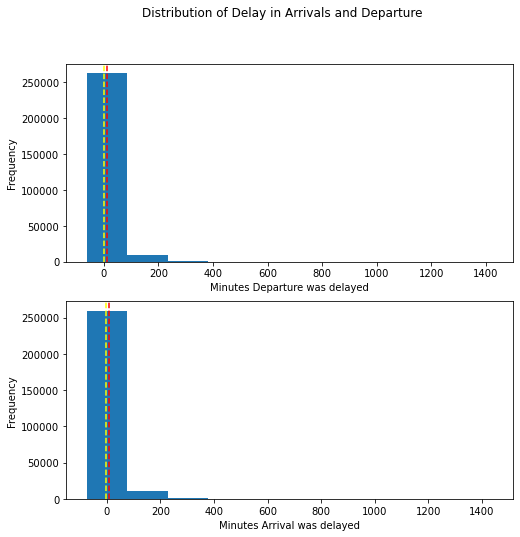

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].hist(dep_delay)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Minutes Departure was delayed')
ax[0].axvline(dep_delay.mean(), color='red', linestyle='dashed')
ax[0].axvline(dep_delay.median(), color='yellow', linestyle='dashed')


ax[1].hist(arr_delay)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Minutes Arrival was delayed')
ax[1].axvline(arr_delay.mean(), color='red', linestyle='dashed')
ax[1].axvline(arr_delay.median(), color='yellow', linestyle='dashed')



plt.suptitle('Distribution of Delay in Arrivals and Departure')

plt.show()

Mean of departure delay: 10.350448628373906
Median of departure delay: -1.0
Mode of departure delay: -3
---------------------------------
Mean of Arrivals delay: 6.496649996322718
Median of Arrivals delay: -3.0
Mode of Arrivals delay: 0


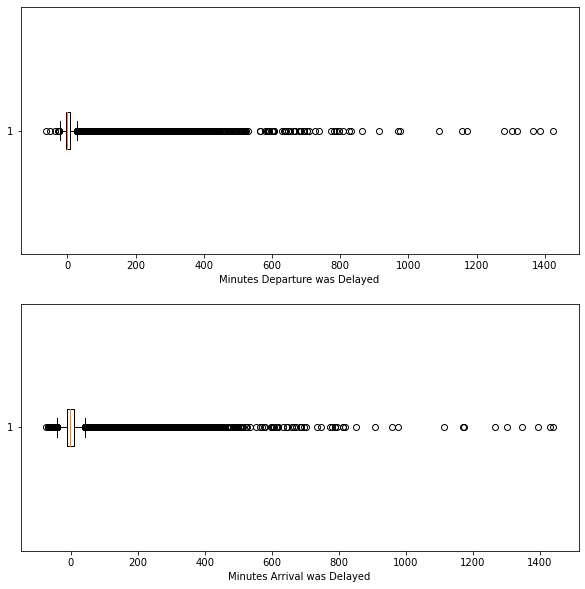

In [10]:
# BOXPLOTS TO SHOW THE OUTLIERS
fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].boxplot(dep_delay, vert=False)
ax[0].set_xlabel('Minutes Departure was Delayed')

print(f'Mean of departure delay: {dep_delay.mean()}')
print(f'Median of departure delay: {dep_delay.median()}')
print(f'Mode of departure delay: {dep_delay.mode()[0]}')

print('---------------------------------')
ax[1].boxplot(arr_delay, vert=False)
ax[1].set_xlabel('Minutes Arrival was Delayed')

print(f'Mean of Arrivals delay: {arr_delay.mean()}')
print(f'Median of Arrivals delay: {arr_delay.median()}')
print(f'Mode of Arrivals delay: {arr_delay.mode()[0]}')

#fig.show()

#### Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

* Let's consider values below the 5th percentile and above the 90th percentile as outliers

In [11]:
# eliminating dep_delay outliers
dep_delay_percentile_5 = dep_delay.quantile(.05) #DepDelay 5th percentile
dep_delay_percentile_90 = dep_delay.quantile(.90) #DepDelay 90th percentile

df_flights = df_flights[df_flights['DepDelay'] > dep_delay_percentile_5]
df_flights = df_flights[df_flights['DepDelay']< dep_delay_percentile_90]

In [12]:
#eliminating arr_delay outliers
arr_delay_percentile_5 = arr_delay.quantile(.05) 
arr_delay_percentile_90 = arr_delay.quantile(.90)

df_flights = df_flights[df_flights['ArrDelay'] > arr_delay_percentile_5]
df_flights = df_flights[df_flights['ArrDelay']< arr_delay_percentile_90]

* let's now show the distributions of both columns

In [13]:
def boxplot_hist(data_col):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(7,5))
    fig,ax = plt.subplots(2,1, figsize=(8,8))
    
    ax[0].hist(data_col)
    ax[0].axvline(data_col.mean(), color='red', linestyle='dashed')
    ax[0].axvline(data_col.median(), color='orange', linestyle='dashed')

    
    ax[1].boxplot(data_col, vert=False)
    ax[1].set_xlabel(f'{data_col.name}')

    print(f'Mean of {data_col.name}: {data_col.mean()}')
    print(f'Median of {data_col.name}: {data_col.median()}')
    print(f'Mode of {data_col.name}: {data_col.mode()[0]}')

    print('---------------------------------')

Mean of ArrDelay: -1.4346241872312715
Median of ArrDelay: -3.0
Mode of ArrDelay: 0
---------------------------------


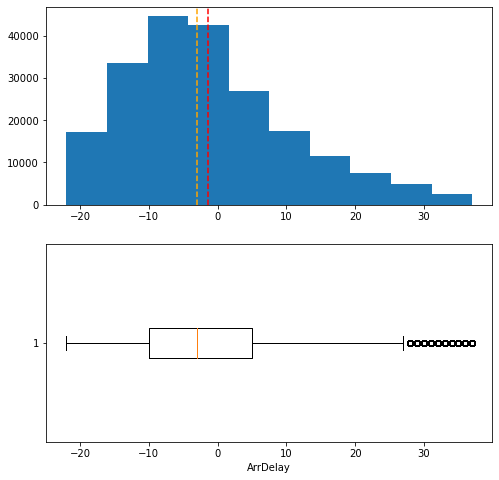

In [14]:
boxplot_hist(df_flights['ArrDelay'])

Mean of DepDelay: 2.315746885384048
Median of DepDelay: -1.0
Mode of DepDelay: -3
---------------------------------


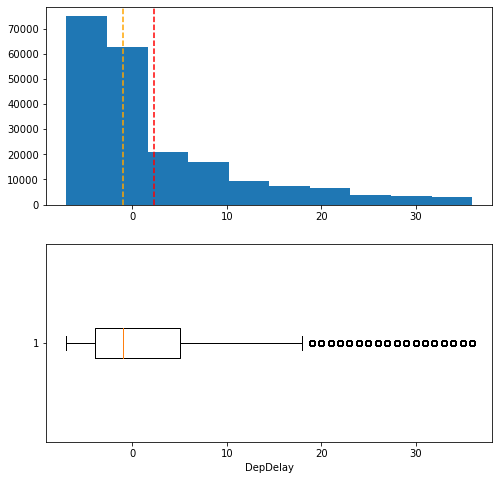

In [15]:
boxplot_hist(df_flights['DepDelay'])

* **The outliers have been removed greatly as seen**

In [16]:
print(f'New shape of dataframe: {df_flights.shape}')

New shape of dataframe: (208854, 20)


#### View summary statistics for the numeric fields in the dataset.

In [17]:
df_flights.describe(include='number')

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,208854.0,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000,208854.000000
mean,2013.0,6.999196,15.823882,3.901448,12741.745861,12738.344121,1302.697650,2.315747,0.116162,1484.172546,-1.434624,0.128903,0.013627
std,0.0,1.990908,8.818289,1.989333,1510.899138,1514.014783,467.638173,9.114443,0.320420,487.112998,12.162406,0.335094,0.115936
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-7.000000,0.000000,1.000000,-22.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,905.000000,-4.000000,0.000000,1110.000000,-10.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1300.000000,-1.000000,0.000000,1505.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1705.000000,5.000000,0.000000,1900.000000,5.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


#### Use statistics, aggregate functions, and visualizations to answer the following questions:
* What are the average (mean) departure and arrival delays?
* How do the carriers compare in terms of arrival delay performance?
* Is there a noticable difference in arrival delays for different days of the week?
* Which departure airport has the highest average departure delay?
* Do late departures tend to result in longer arrival delays than on-time departures?
* Which route (from origin airport to destination airport) has the most late arrivals?
* Which route has the highest average arrival delay?

In [18]:
#Average depature and arrival delays
print(f"Average departure delay: {df_flights['DepDelay'].mean()}")
print('------------------------------------------------------')
print(f"Average arrival delay: {df_flights['ArrDelay'].mean()}")

Average departure delay: 2.315746885384048
------------------------------------------------------
Average arrival delay: -1.4346241872312715


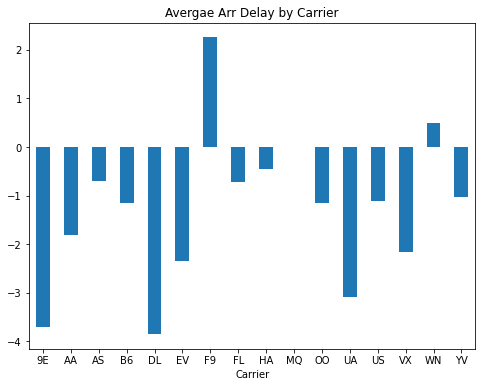

In [19]:
# How do the carriers compare in terms of arrival delay performance
carrier_by_ArrDelay = df_flights.groupby(by='Carrier')['ArrDelay'].mean()
carrier_by_ArrDelay.plot(kind='bar', rot=0, figsize=(8,6))
plt.title('Avergae Arr Delay by Carrier')
plt.show()

* **The above plot shows that on an average, most of the carriers arrive ahead of schedule**

* Let's see a boxplot for more clarity!

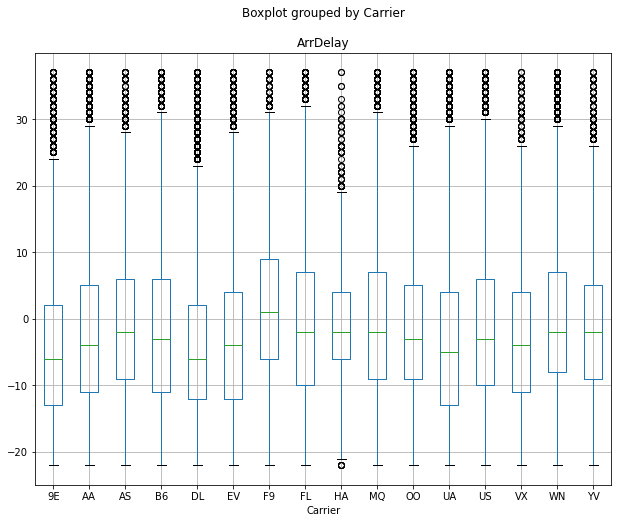

In [20]:
df_flights.boxplot(column='ArrDelay', by='Carrier',figsize=(10,8))
plt.show()

#### Is there a noticable difference in arrival delays for different days of the week?

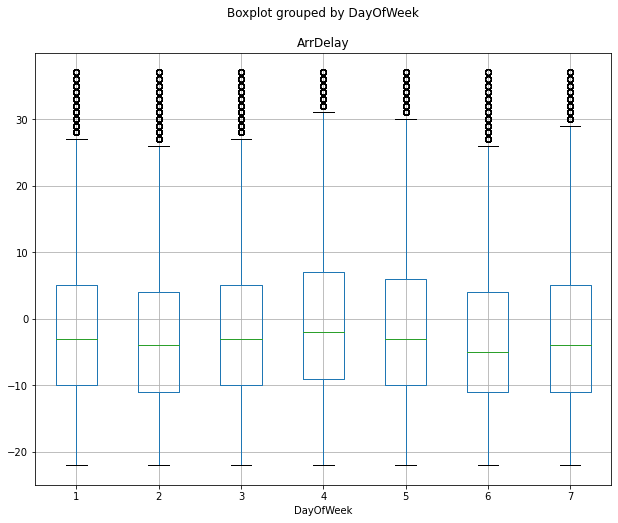

In [21]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek',figsize=(10,8))
plt.show()

#### Which departure airport has the highest average departure delay?

<AxesSubplot:xlabel='OriginAirportName'>

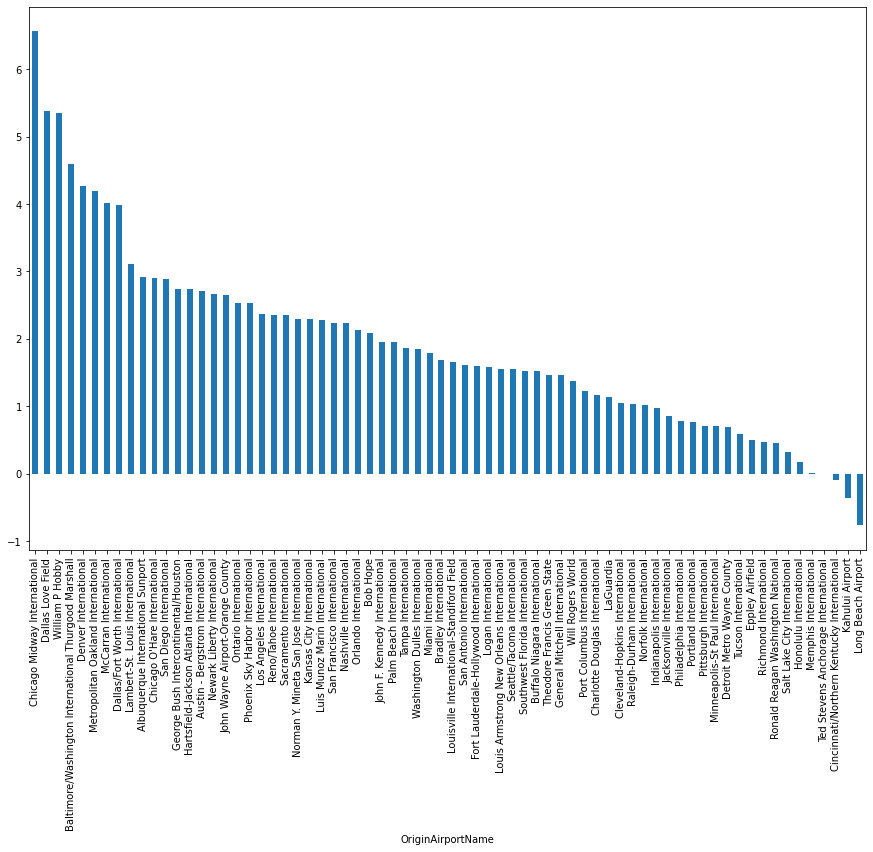

In [22]:
avg_dep_delay_by_dep_airport = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
avg_dep_delay_by_dep_airport.plot(kind='bar',figsize=(15,10))

* That'll be Chicago Midway International

In [25]:
pd.DataFrame(avg_dep_delay_by_dep_airport)

,DepDelay
OriginAirportName,
Chicago Midway International,6.563717
Dallas Love Field,5.388077
William P Hobby,5.348019
Baltimore/Washington International Thurgood Marshall,4.593630
Denver International,4.262430
...,...
Memphis International,0.005356
Ted Stevens Anchorage International,-0.008299
Cincinnati/Northern Kentucky International,-0.090011


#### Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

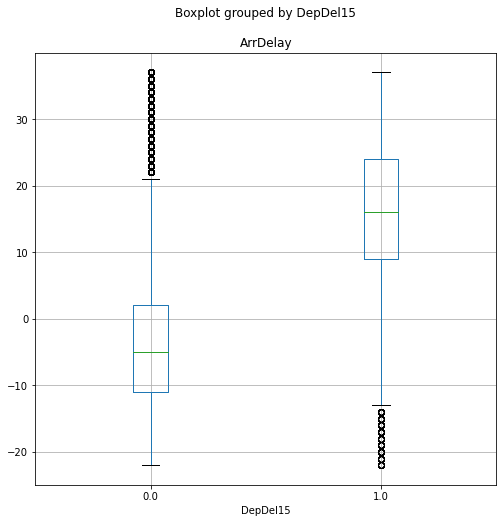

In [23]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(8,8))

The above plot shows that late departures most of the times leads to longer arrival delays

#### Which route (from origin airport to destination airport) has the most late arrivals?

In [24]:
df_flights.groupby(['OriginAirportName','DestAirportName'])['ArrDel15'].sum().sort_values(ascending=False)

OriginAirportName                    DestAirportName                           
San Francisco International          Los Angeles International                     145
Los Angeles International            San Francisco International                   123
McCarran International               Los Angeles International                      90
LaGuardia                            Hartsfield-Jackson Atlanta International       84
Los Angeles International            McCarran International                         79
                                                                                  ... 
LaGuardia                            Eppley Airfield                                 0
Kansas City International            Metropolitan Oakland International              0
Ted Stevens Anchorage International  Salt Lake City International                    0
Kahului Airport                      Ted Stevens Anchorage International             0
San Diego International              Cincinnati/No

* **The most late arrivals occurs on the San Francisco International to Los Angeles International route**

#### Which route has the highest average arrival delay?

In [25]:
df_flights.groupby(['OriginAirportName','DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)

OriginAirportName                          DestAirportName                     
Louis Armstrong New Orleans International  Ronald Reagan Washington National       25.333333
Cleveland-Hopkins International            Philadelphia International              16.000000
Denver International                       Raleigh-Durham International            14.153846
Charlotte Douglas International            General Mitchell International          13.500000
Memphis International                      Denver International                    12.925926
                                                                                     ...    
Eppley Airfield                            LaGuardia                              -16.000000
Kahului Airport                            Ted Stevens Anchorage International    -16.000000
Denver International                       Kahului Airport                        -17.000000
Ted Stevens Anchorage International        George Bush Intercontinental/Houston   -

* **Louise Armstrong New Orleans to Ronald Reagan Washington has the highest average arrival delay**